<div style="text-align: right">INFO 6105 Data Sci Engineering Methods and Tools, Lecture 4 Day 2</div>
<div style="text-align: right">Prof. Dino Konstantopoulos, 25 September 2019</div>

# A Preview of attractions

`pandas` is a Python package providing fast, flexible, and expressive data structures designed to work with relational or labeled (hierarchical) data or both. It is a fundamental high-level building block for doing practical, real world, scientific, data analysis in Python.

`scikit-learn` is a Python package for probabilistic statistics. It's our introduction to ML package, and it works so well with pandas that examples of both of them are low-hanging fruit for professors. 

#### The friends of pandas

Matplotlib, seaborn, numpy, statsmodels, scipy, scikit-learn


## Decision Trees and regression trees

The idea behind **decision tress** is to split a dataset based on **homogeneity of data**. A **decision tree** is built top-down from a **root node** and involves partitioning the data into **subsets** that contain instances with similar **values** (homogenous). 

On the other hand, in a **regression tree**, since the target (dependent) variable is a real valued number, we fit a regression model to the target variable using each of the ***independent variables***. 

Then for each independent variable, the data is split at several **split points**. We calculate Sum of Squared Error(SSE) at each split point between the predicted value and the actual values. The variable resulting in minimum SSE is selected for the node. Then this process is recursively continued till the entire data is covered. Each split point may belong to a different independent variable.

All of us actually use decision trees in our daily life! To illustrate the concept, let's use an everyday example: predicting tomorrow’s maximum temperature for Boston. Wasn't today better than two days ago?!

In order to answer the single max temperature question, we need to work through an entire series of queries. We start by forming an initial reasonable range given our domain knowledge, which for Boston is very little.. Let's say that it's 40–90 degrees Fahrenheit. Gradually, through a set of questions and answers we will reduce this range until we are confident enough to make a single prediction.

What makes a good question to start with? What kind of idnependent variable should we split the data by? Well, if we want to limit the range **as much as possible** initially, let's think of the most relevant question to ask. Since temperature is highly dependent on time of year, a decent place to start would be: what season are we in? Fall, right? So we can limit the prediction range to 40–90 degrees because we have an idea of what the general max temperatures are in Boston fall. This first question already cuts our range by a lot. We use that independent variable as our first node variable. But, this question isn’t quite enough to narrow down our estimate so we need to find out more information for our second node.

A good follow-up question is: what is the historical average max temperature on this day? For Boston, the answer is 56 degrees. This allows us to further restrict our range of consideration to, let's say, 40–60 degrees. 

Two questions (two nodes)  are still not quite enough to make a prediction because this year might be warmer or colder than average. Therefore, we also would want to look at the max temperature today to get an idea if the year has been unusually warm or cold. Our question is simple: what is the maximum temperature today? If the max temperature today was 60 degrees, it might be colder this year and our estimate for tomorrow should be a little lower than the historical average. At this point, we can feel pretty confident in making a prediction of 55 degrees for the max temperature tomorrow. 

So, to arrive at an estimate, we used a series of questions, with each question narrowing our possible values until we were confident enough to make a single prediction. So, following one path (the most probable one) down the tree, we used 3 nodes to make a decision. 

We also need to complete all paths and add nodes to all split points so we have a decision for each leaf of the tree (we did not do this in our questioning above).

**Regression Forests** are different than a single tree: They are an **ensemble** of different regression trees. These models work on the principle of the **wisdom of the crowd** . In short, it is better to consider the opinions of 1000 different people with not much knowledge than to consider the opinion of only one expert (provided the 1000 people have accuracy better than random guessing, i.e more than 50%). There is actually a mathematical proff about this.

Ok, is our intuition about the algorithm in place?

## A use case

In [1]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [2]:
import pandas as pd
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

This is the **data**! The data that doctors should use to diagnose potential breast cancer:

In [3]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


These are the **labels**: The describe whether patients with above symptosm did end having cancer. `1`s are cancer, `0`s are no cancer:

In [4]:
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Length: 569, dtype: int32

**MORE COMPLEX VERSION, MAY NEED PROFESSOR-LEVEL PACKAGES**

If you're missing packages, then jump cells below and straight to the cell marked **RUN HERE FOR SIMPLE STANDALONE VERSION**

In [7]:
!pip install sklearn
!pip install sklearn.grid_search

  ERROR: Could not find a version that satisfies the requirement sklearn.grid_search (from versions: none)
ERROR: No matching distribution found for sklearn.grid_search


In [5]:
#from sklearn.grid_search import GridSearchCV

Let's import our curve-building algorithm using tree-logic as explained above.

In [6]:
from sklearn.ensemble import RandomForestRegressor
#from sklearn.grid_search import GridSearchCV

Let's learn from our dataset.

In [7]:
%%time
import numpy as np
from sklearn.model_selection import GridSearchCV
param_grid = dict(
    max_features=np.arange(2, 8),
    max_depth=[2, 4],
    min_samples_split=[5, 10, 15, 20],
)
rfc = RandomForestRegressor(n_estimators=10)
gs = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)
gs.fit(X.values, y.values)

Wall time: 3.9 s


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=10, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 4],
                

In [8]:
# scores = gs.grid_scores_
scores = gs.cv_results_["mean_test_score"]
scores[:10]

array([0.69539489, 0.71240517, 0.7477299 , 0.70727665, 0.76075952,
       0.76309285, 0.7645608 , 0.73557626, 0.7503402 , 0.76230606])

These are the features that doctors ought to be paying attention to in order to diagnose cancer:

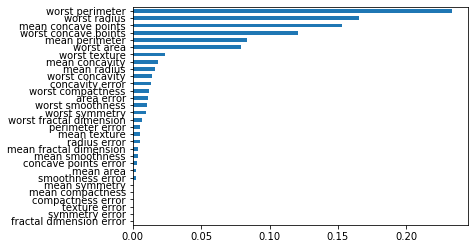

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.Series(gs.best_estimator_.feature_importances_,
          index=X.columns).sort_values().plot(kind='barh')

### RUN HERE FOR SIMPLE STANDALONE VERSION

This is the simpler version of the regression forest algorithm that is likely to work very well without dependencies. It's what we used last class.

We split a dataset into a training bundle and a testing bundle. We train a Machine Learning algorithm on the training bundle, and then we test on the test bundle to see *if it guesses right*!

In [10]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(X.values, y.values, test_size = 0.25,
                                                                           random_state = 42)

In [11]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor

# Instantiate model 
rf = RandomForestRegressor(n_estimators= 10, random_state=42)

# Train the model on training data
rf.fit(train_features, train_labels)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

What's the guess in error on the test bundle?

In [12]:
import numpy as np

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

# Calculate the absolute errors
errors = abs(predictions - test_labels)

print(predictions)
print(test_labels)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

[1.  0.  0.  1.  1.  0.  0.  0.3 0.  0.9 0.9 0.  1.  0.2 0.9 0.  1.  1.
 1.  0.  0.8 1.  0.  1.  1.  1.  1.  0.9 1.  0.  1.  1.  0.7 1.  1.  1.
 0.2 1.  0.  1.  1.  0.  1.  1.  0.6 1.  0.9 0.9 1.  1.  0.  0.  1.  1.
 1.  1.  1.  0.  0.2 1.  1.  0.  0.  1.  1.  0.9 0.  0.  1.  1.  0.  0.
 1.  0.  1.  0.9 1.  0.7 1.  1.  0.1 1.  0.8 0.  0.3 0.  0.1 0.  1.  1.
 1.  0.6 0.8 1.  1.  1.  0.  0.  1.  0.  0.1 1.  0.1 0.  1.  1.  1.  0.
 0.4 0.9 0.  1.  0.8 0.  0.6 0.  1.  1.  0.9 0.  0.5 1.  1.  0.  1.  0.
 0.  1.  1.  0.  0.2 0.  0.9 1.  0.8 0.1 0.1 1.  0.7 0.  1.  0.  1. ]
[1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0 1 0 1 1 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 0 1]
Mean Absolute Error: 0.07


Wowwwwww... 

In [13]:
# Saving feature names for later use
feature_list = list(X.columns)
feature_list

['mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

What are the synptoms that doctors should be paying attention to, prioritized, in order to correctly diagnose breast cancer?

In [14]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: worst concave points Importance: 0.33
Variable: mean concave points  Importance: 0.29
Variable: worst perimeter      Importance: 0.16
Variable: worst area           Importance: 0.05
Variable: worst texture        Importance: 0.04
Variable: worst radius         Importance: 0.03
Variable: mean radius          Importance: 0.01
Variable: mean texture         Importance: 0.01
Variable: mean area            Importance: 0.01
Variable: radius error         Importance: 0.01
Variable: area error           Importance: 0.01
Variable: concavity error      Importance: 0.01
Variable: worst smoothness     Importance: 0.01
Variable: worst concavity      Importance: 0.01
Variable: mean perimeter       Importance: 0.0
Variable: mean smoothness      Importance: 0.0
Variable: mean compactness     Importance: 0.0
Variable: mean concavity       Importance: 0.0
Variable: mean symmetry        Importance: 0.0
Variable: mean fractal dimension Importance: 0.0
Variable: texture error        Importance: 0

# Conclusion

This is exactly what IBM's Watson is doing (albeit with ***a lot*** more data) and fooling the world into thinking it is some kind of Artificial Intelligence. Nope, it's just **statistics**.

What dataset would you like to apply this to, dress up like a magician, and amaze your friends?

<br />
<center>
    <img src="images/fortune-teller-reading-crystal-ball.jpg" width=600 />
</center>